<a href="https://colab.research.google.com/github/leoalexandre/mvp_mach_learn/blob/main/mvp_pro_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUC-Rio**
# Pós Graduação em Ciências de Dados e Analytics
# Sprint: Machine Learning & Analytics
# Leonardo Alexandre

##**1.   Definição do Problema**

As doenças cardiovasculares são umas das principais causas de morte no mundo.
"Estima-se que 17,9 milhões de pessoas morreram por doenças cardiovasculares em 2016, representando 31% de todas as mortes em nível global. Destes óbitos, estima-se que 85% ocorrem devido a ataques cardíacos e acidentes vasculares cerebrais (AVCs)."

Mais de três quartos das mortes por doenças cardiovasculares ocorrem em países de baixa e média renda.

Das 17 milhões de mortes prematuras (pessoas com menos de 70 anos) por doenças crônicas não transmissíveis, 82% acontecem em países de baixa e média renda e 37% são causadas por doenças cardiovasculares.

A partir deste conjunto de dadps, construí modelos de classificação. Dos 76 atributos existentes no dados, vamos utilizar os 14 atributos mais importante para análise referente a doenças cardiácas de 200 pacientes. Esses atributos foram pré-selecionados e disponibilizados em um banco de dados diferente pelo próprio site da UCI.

In [38]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.metrics import confusion_matrix # para fazer matriz de confusão
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import GridSearchCV # para ajustar paramêtros automaticamente do modelo
from sklearn.metrics import accuracy_score # para exibição da acurácia do modelo
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier # Algoritmo de KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVR # Algoritmo de SVM
from sklearn.preprocessing import StandardScaler # função de pre processamento para padronizar
from sklearn.preprocessing import MinMaxScaler # função de pre processamento para normalizar
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão

In [26]:
# Url a importar
url = 'https://raw.githubusercontent.com/leoalexandre/mvp_mach_learn/main/processed.va.data'

# Labels dos atributos do dataset
labels_atributos = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

# Carga do dataset através do csv
dataset = pd.read_csv(url, delimiter=',', names=labels_atributos, skiprows=0)

# Subtituindo os ? por 0
dataset=dataset.replace('?',0)

# Verifica o tipo de dado
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [27]:
# Mostra a parte inicial do dataset e seus atributos
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,0,0,0
6,65,1,4,150,236,1,1,105,1,0,0,0,0,3
7,60,1,3,180,0,0,1,140,1,1.5,2,0,0,0
8,60,1,3,120,0,0,0,141,1,2,1,0,0,3
9,60,1,2,160,267,1,1,157,0,0.5,2,0,0,1


Text(0.5, 1.0, 'Relação Eletrocardiografia vs gravidade da doença')

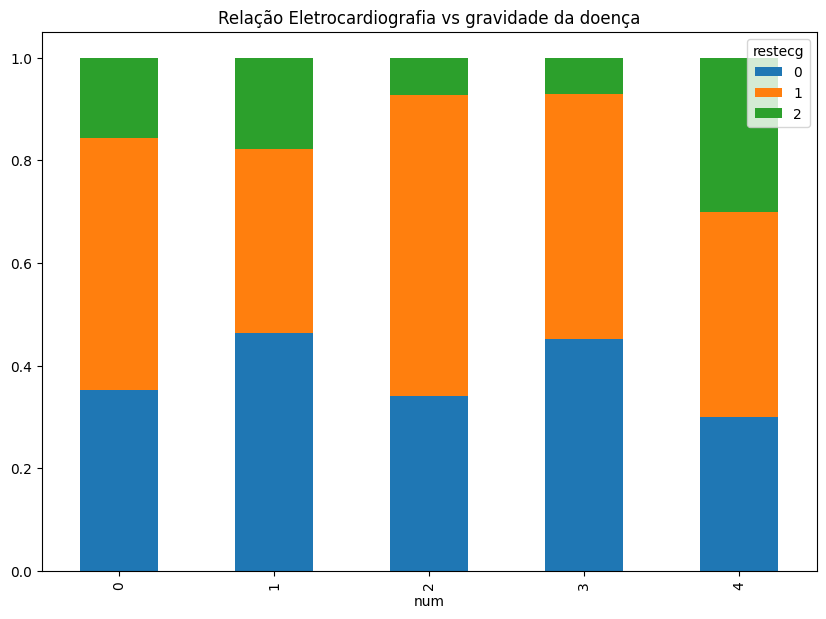

In [28]:
# Relação Eletrocardiografia vs gravidade da doença

dat = pd.crosstab(dataset['num'], dataset['restecg'])
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))
plt.title('Relação Eletrocardiografia vs gravidade da doença', fontsize = 12)

In [29]:
# Mostra as dimensões do dataset
print(dataset.shape)

(200, 14)


In [130]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

# Checando as dimensões
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Checando tipo do dado
print(type(X_train))

(160, 13) (160,) (40, 13) (40,)
<class 'numpy.ndarray'>


LR: MSE 1.29 (0.51) - RMSE 1.14
Ridge: MSE 1.29 (0.50) - RMSE 1.13
Lasso: MSE 1.45 (0.50) - RMSE 1.20
KNN: MSE 1.48 (0.64) - RMSE 1.22
CART: MSE 2.98 (0.99) - RMSE 1.73
SVM: MSE 1.51 (0.57) - RMSE 1.23


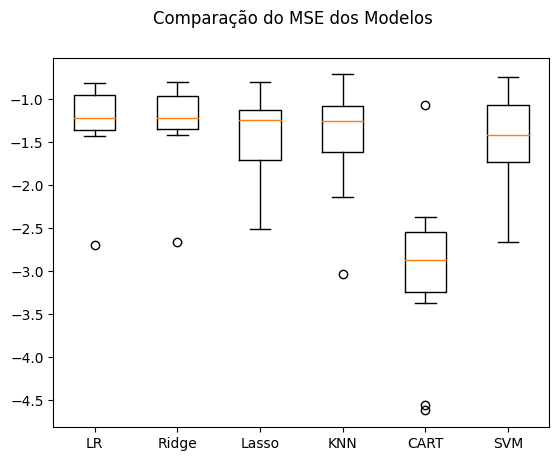

In [131]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR-padr: MSE 1.29 (0.51) - RMSE 1.14
LR-norm: MSE 1.29 (0.51) - RMSE 1.14


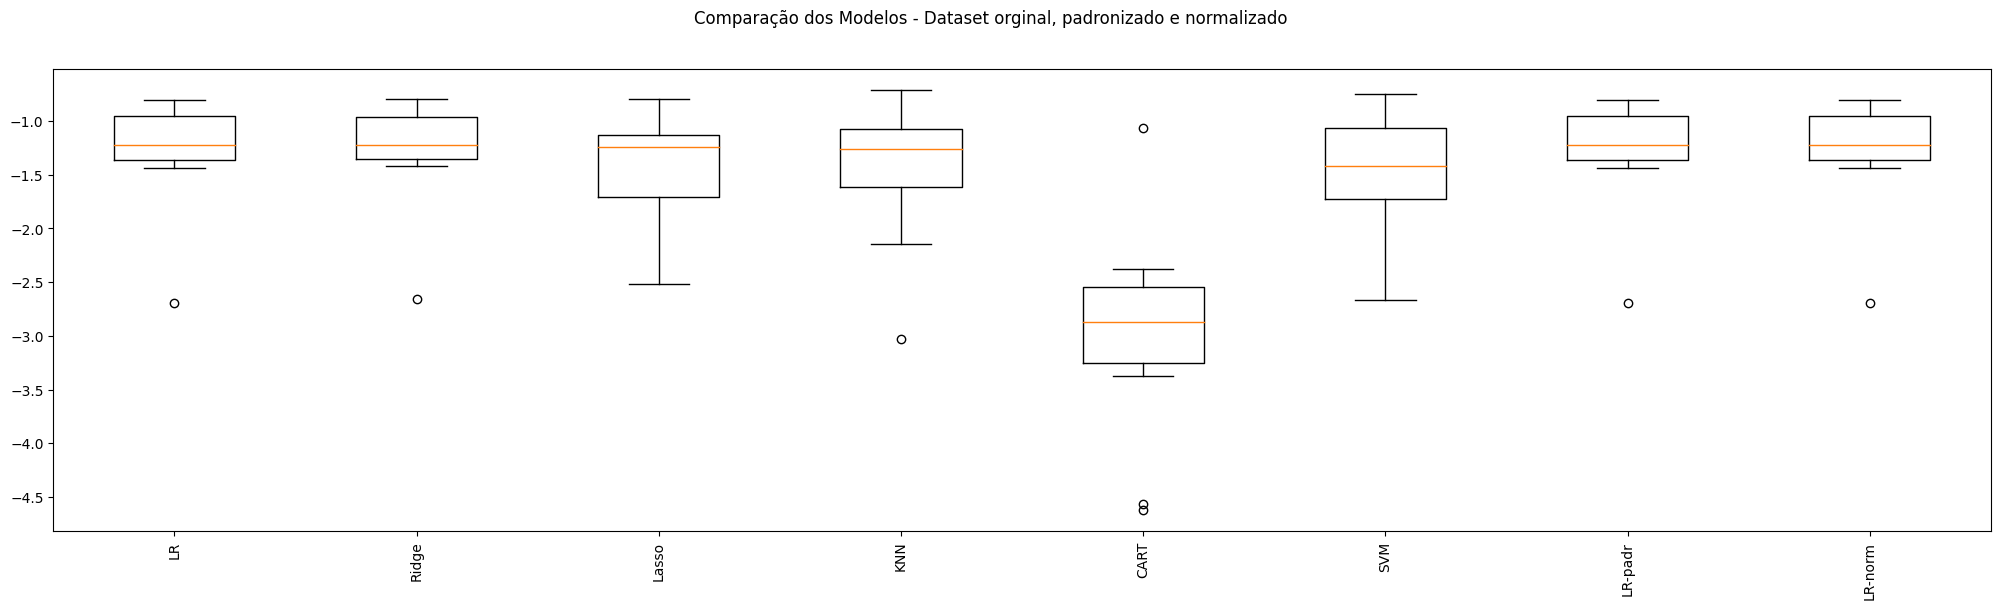

In [132]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results_pn = []
names_pn = []

# Preparando os modelos e adicionando-os em uma lista
#models.append(('LR', LinearRegression()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVR()))
#models.append(('NB', GaussianNB()))

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
lr = ('LR', LinearRegression())
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
svm = ('SVM', SVR())
naive_bayes = ('NB', GaussianNB())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
#pipelines.append(('LR-orig', Pipeline([lr])))
#pipelines.append(('KNN-orig', Pipeline([knn])))
#pipelines.append(('CART-orig', Pipeline([cart])))
#pipelines.append(('NB-orig', Pipeline([naive_bayes])))
#pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, lr])))
#pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
#pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
#pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
#pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, lr])))
#pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
#pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
#pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
#pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
  cv_results = cross_val_score (model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()